### Data loading & processing

In [1]:
from PIL import Image
import glob
import numpy as np

def extract_image_data(file_path):
    extracted_set = []
    for filename in glob.glob(file_path):
        img = Image.open(filename) 
        img = img.resize((200,200))   # reshape to 200 * 200 pixel for model analysis
        data = list(img.getdata())   # extract image to RGB data points
        img.close()
        data = np.array(list(map(list, data))) # convert the data into 3D list
        extracted_set.append(data)
    return extracted_set
        
man_clothing = extract_image_data('Man-Clothing/*.JPEG')
woman_clothing = extract_image_data('Woman-Clothing/*.JPEG')

In [2]:
print ("Man closing image data sample:")
print (man_clothing[2])
print ("\n")
print ("Woman closing image data sample:")
print (woman_clothing[5])

Man closing image data sample:
[[200 201 205]
 [201 201 209]
 [202 203 207]
 ...
 [194 199 205]
 [194 199 205]
 [194 197 204]]


Woman closing image data sample:
[[196  28  27]
 [195  27  26]
 [197  29  28]
 ...
 [189  27  25]
 [188  26  24]
 [187  28  25]]


In [3]:
X = np.array(man_clothing + woman_clothing)
Y = np.array([0] * len(man_clothing) + [1] * len(woman_clothing))
Y = Y.reshape(Y.shape[0], )

print ("X shape:", X.shape)
print ("Y shape:", Y.shape)

X shape: (400, 40000, 3)
Y shape: (400,)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.rcParams['figure.figsize'] = [8, 8]
samples = np.random.choice(X.shape[0], size=16)

count = 1
for sample in samples:
    plt.subplot(4,4, count)
    plt.axis('off')
    plt.imshow(X[sample].reshape(200,200,3))
    count += 1

### Logistic regression on original data

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_log_regression = X.reshape(400, 120000)
X_train, X_test, Y_train, Y_test = train_test_split(X_log_regression, Y, test_size = 0.25, random_state=10)

log_regression = LogisticRegression()
log_regression.fit(X_train, Y_train)

Y_predicted = log_regression.predict(X_test)
print ("The accuracy score is {:.3f}".format(accuracy_score(Y_test, Y_predicted)))
print ("\n")
print ("Classification report:")
print(classification_report(Y_test, Y_predicted))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy score is 0.610


Classification report:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64        56
           1       0.55      0.59      0.57        44

   micro avg       0.61      0.61      0.61       100
   macro avg       0.61      0.61      0.61       100
weighted avg       0.61      0.61      0.61       100



### Logistic regression
Logistic regression is a simple linear supervised classification model. In this case, it achieved 61% accuracy on the original data. This is a pretty good result considering how messy the dataset it. As we can see, the images in the datasets are in different sizes, from different sources, and have very different presentation.

### PCA transformation

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)   # use PCA to reduce 40000 dimensions to 100 dimensions for each rgb chanel

X_pca = np.zeros(shape=(X.shape[0], 100, 3))
X_pca_components = np.zeros(shape=(100, 40000, 3))

X_pca[:,:,0] = pca.fit_transform(X[:,:,0])
print ("PCA explained ratio is {:2f} for the red chanel".format(sum(pca.explained_variance_ratio_)))
X_pca_components[:,:,0] = pca.components_
X_pca[:,:,1] = pca.fit_transform(X[:,:,1])
print ("PCA explained ratio is {:2f} for the green chanel".format(sum(pca.explained_variance_ratio_)))
X_pca_components[:,:,1] = pca.components_
X_pca[:,:,2] = pca.fit_transform(X[:,:,2])
print ("PCA explained ratio is {:2f} for the blue chanel".format(sum(pca.explained_variance_ratio_)))
X_pca_components[:,:,2] = pca.components_

PCA explained ratio is 0.878942 for the red chanel
PCA explained ratio is 0.880316 for the green chanel
PCA explained ratio is 0.886031 for the blue chanel


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Directions of maximum variance in the data for the first image:
[[-0.00694518  0.00737023  0.00757739]
 [-0.00693671  0.00732409  0.0074992 ]
 [-0.00692888  0.00732644  0.00745853]
 ...
 [-0.00671953  0.00697513  0.00722743]
 [-0.00673725  0.0069111   0.00716811]
 [-0.00677275  0.00699032  0.00728239]]
Normalized:
[[-0.54911161  0.5827175   0.59909661]
 [-0.5518584   0.5826765   0.59660741]
 [-0.55242971  0.58412651  0.59465758]
 ...
 [-0.55603562  0.57718643  0.59806372]
 [-0.56039612  0.5748568   0.59623472]
 [-0.55715337  0.57505172  0.599079  ]]
As the original data is trivial, we will normalize the data to show a better visualization.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

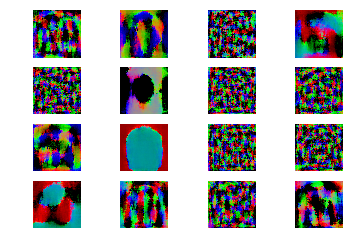

In [7]:
from sklearn.preprocessing import normalize

np.random.seed(1)

print ("Directions of maximum variance in the data for the first image:")
print (X_pca_components[0])
print ("Normalized:")
print (normalize(X_pca_components[0]))
print ("As the original data is trivial, we will normalize the data to show a better visualization.")

samples = np.random.choice(100, size=16)

count = 1
for sample in samples:
    plt.subplot(4,4, count)
    plt.axis('off')
    display_data= normalize(X_pca_components[sample])
    plt.imshow(display_data.reshape(200,200,3))
    count += 1

### Logistic regression on PCA transformed data

In [8]:
X_log_regression = X_pca.reshape(400, 300)
X_train, X_test, Y_train, Y_test = train_test_split(X_log_regression, Y, test_size = 0.25, random_state=10)

log_regression = LogisticRegression()
log_regression.fit(X_train, Y_train)

Y_predicted = log_regression.predict(X_test)
print ("The accuracy score is {:.3f}".format(accuracy_score(Y_test, Y_predicted)))
print ("\n")
print ("Classification report:")
print(classification_report(Y_test, Y_predicted))

The accuracy score is 0.590


Classification report:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        56
           1       0.53      0.59      0.56        44

   micro avg       0.59      0.59      0.59       100
   macro avg       0.59      0.59      0.59       100
weighted avg       0.60      0.59      0.59       100



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### PCA transformation summary
We saw a decrease in model classification performance. However, this is within the expectation as we are reducing the data from 40000*3 to 100*3, which is only 0.25% size of the original data. The accuracy of classification decreased from 61% to 57% which is not a significant difference. PCA transformation not only significantly reduced the data size, the fewer dimension of data also makes the logistic regression training much faster. This shows PCA transformation is an effective and useful way of storing data. And is much preferable compare to the original data in the case that storage cost and computational cost is a major concern.

### LDA transformation

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_lda = np.zeros(shape=(X.shape[0], 100, 3))
X_lda_coef = np.zeros(shape=(40000, 3))

lda = LinearDiscriminantAnalysis()

X_lda[:,:,0] =lda.fit_transform(X[:,:,0], Y)
print ("LDA explained ratio is {:2f} for the red chanel".format(lda.score(X[:,:,0], Y)))
X_lda_coef[:,0] = lda.coef_.reshape(40000)
X_lda[:,:,1] =lda.fit_transform(X[:,:,1], Y)
print ("LDA explained ratio is {:2f} for the green chanel".format(lda.score(X[:,:,1], Y)))
X_lda_coef[:,1] = lda.coef_.reshape(40000)
X_lda[:,:,2] =lda.fit_transform(X[:,:,2], Y)
print ("LDA explained ratio is {:2f} for the blue chanel".format(lda.score(X[:,:,2], Y)))
X_lda_coef[:,2] = lda.coef_.reshape(40000)

/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA explained ratio is 0.915000 for the red chanel


/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA explained ratio is 0.872500 for the green chanel


/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA explained ratio is 0.867500 for the blue chanel


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Directions of maximum variance in the data for the first image:
[[ 2.49705273e-05  4.01366665e-05  2.90624833e-05]
 [-6.35597042e-06  1.76355278e-05  1.64974523e-05]
 [ 1.22888240e-05  1.86090201e-05  6.39721281e-06]
 ...
 [-1.88243238e-05 -1.36490524e-06 -7.62077135e-06]
 [ 4.72581629e-06  1.45157967e-05 -2.60993649e-05]
 [-5.62676193e-06  4.85749471e-06 -2.23952078e-05]]
Normalized:
[[ 0.4500029   0.72331738  0.52374552]
 [-0.25452891  0.70622603  0.66065106]
 [ 0.52969307  0.80211655  0.27574317]
 ...
 [-0.92483639 -0.0670576  -0.37440743]
 [ 0.15629742  0.48008249 -0.86318707]
 [-0.23845615  0.20585543 -0.94908493]]
As the original data is trivial, we will normalize the data to show a better visualization.


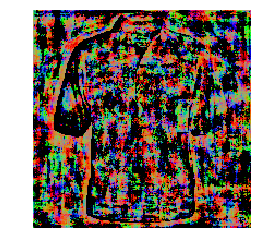

In [10]:
print ("Directions of maximum variance in the data for the first image:")
print (X_lda_coef)
print ("Normalized:")
print (normalize(X_lda_coef))
print ("As the original data is trivial, we will normalize the data to show a better visualization.")

plt.axis('off')
display_data= normalize(X_lda_coef)
plt.imshow(display_data.reshape(200,200,3))

### Logistic regression on LDA transformed data

In [11]:
X_log_regression = X_lda.reshape(400, 300)
X_train, X_test, Y_train, Y_test = train_test_split(X_log_regression, Y, test_size = 0.25, random_state=10)

log_regression = LogisticRegression()
log_regression.fit(X_train, Y_train)

Y_predicted = log_regression.predict(X_test)
print ("The accuracy score is {:.3f}".format(accuracy_score(Y_test, Y_predicted)))
print ("\n")
print ("Classification report:")
print(classification_report(Y_test, Y_predicted))

The accuracy score is 0.900


Classification report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        56
           1       0.90      0.86      0.88        44

   micro avg       0.90      0.90      0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### LDA transformation summary
This result is much better than running logistic regression against the PCA transformed data and the original data. However, this is an unfair approach, as LDA optimize against the class of the images. In other words, the data reduction procedure utilized the class information, thus making image data biased to the class label. In a way, this makes the train test separation meaningless, as all data encoded are already optimized against the class label. The LDA approach may still be useful if we are interested in preserving the data in a label related way.